# Love Bytes: A Comprehensive Analysis of Dating App Reviews (2017-2022)

**Introduction:**
Dating apps have become an integral part of modern romance, revolutionizing the way people meet and connect. Understanding user sentiments, trends, and preferences within this digital landscape is crucial for developers, researchers, and users alike. This report aims to provide insights into the evolution of dating apps through an analysis of reviews spanning the years 2017 to 2022.

**Methodology:**
The data for this analysis was collected using the Google Play Scraper tool, extracting reviews from various dating apps across different regions. The dataset consists of seven columns including the app name, review text, rating, number of thumbs up, date and time of the review, and app name. 

**Key Findings:**
1. **Trend of Downloads:** Dating app downloads have shown an increasing trend over the years, indicating the growing popularity of online dating platforms.
2. **Favorable Responses:** Certain dating apps have consistently received higher average ratings over the years, suggesting a level of user satisfaction and trust in these platforms.
3. **Common Issues:** Reviews with ratings below 3 often highlight common issues such as glitches, poor user experience, and lack of matches.
4. **Relationship Outcomes:** While textual analysis may not provide definitive answers, a significant portion of reviews mention finding relationships, love, or suitable partners through dating apps.
5. **User Enthusiasm vs. Rating:** There seems to be a positive correlation between user enthusiasm, indicated by the number of thumbs up, and higher ratings.
6. **Usefulness of Top Rated Reviews:** Top-rated reviews tend to receive more thumbs up from other users, indicating their perceived usefulness and credibility.
7. **Common Users Among Apps:** A considerable number of users have accounts on multiple dating apps, with preferences varying among individuals.
8. **Favored App Among Common Users:** Among users who use multiple dating apps, certain apps emerge as favorites, indicating stronger user affinity towards specific platforms.
9. **Distribution of Ratings Across Apps:** Different dating apps exhibit varying distributions of ratings, with some apps consistently receiving higher ratings than others.
10. **Time Series Analysis:** Time series analysis of ratings for specific apps reveals fluctuations and trends in user satisfaction over time.

**Conclusion:**
Dating app reviews provide valuable insights into user experiences, preferences, and sentiments over the years. By analyzing this data, developers can identify areas for improvement, researchers can understand societal trends in online dating behavior, and users can make informed decisions when choosing dating platforms. As the digital landscape of romance continues to evolve, ongoing analysis of dating app reviews will remain essential for keeping pace with user expectations and preferences.

**Recommendations:**
1. Continuously monitor user feedback and address common issues highlighted in low-rated reviews.
2. Invest in improving user experience and app functionality to enhance user satisfaction and retention.
3. Implement features that facilitate meaningful connections and relationship-building to align with user expectations.
4. Foster a community-driven approach by leveraging the usefulness of top-rated reviews and encouraging user engagement.
5. Conduct further research to delve deeper into the nuances of user behavior and preferences within the realm of dating apps.

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/kaggle/input/datingappreviews/DatingAppReviewsDataset.csv")

In [24]:
df.head()

,Unnamed: 0,Name,Review,Rating,#ThumbsUp,Date&Time,App
0,0,linah sibanda,On this app i cant find a partner,5,0,18-02-2022 01:19,Tinder
1,1,Norman Johnson,Tinder would be so much better if we could spe...,3,0,18-02-2022 01:16,Tinder
2,2,David Hume,Still doesn't correctly notify matches or mess...,1,0,18-02-2022 01:11,Tinder
3,3,Last 1 Standing,"Got banned because I updated my bio to say ""I ...",2,0,18-02-2022 01:11,Tinder
4,4,Arthur Magamedov,Love it!,5,0,18-02-2022 01:06,Tinder


In [25]:
df.tail()

,Unnamed: 0,Name,Review,Rating,#ThumbsUp,Date&Time,App
681989,52989,A Google user,Useless - I'm in the UK and it tells me i'm ov...,2,5,12-07-2017 01:44,Hinge
681990,52990,Brian Shook,I can't get past the initial set up. It won't...,1,11,12-07-2017 01:36,Hinge
681991,52991,A Google user,This is incredible! A quality dating app for A...,5,1,12-07-2017 01:32,Hinge
681992,52992,A Google user,"""Over Water"" ... Can't choose location.",2,8,12-07-2017 01:28,Hinge
681993,52993,Dylan Fick,"My entire town counts as ""over water"" and I ca...",2,15,12-07-2017 01:24,Hinge


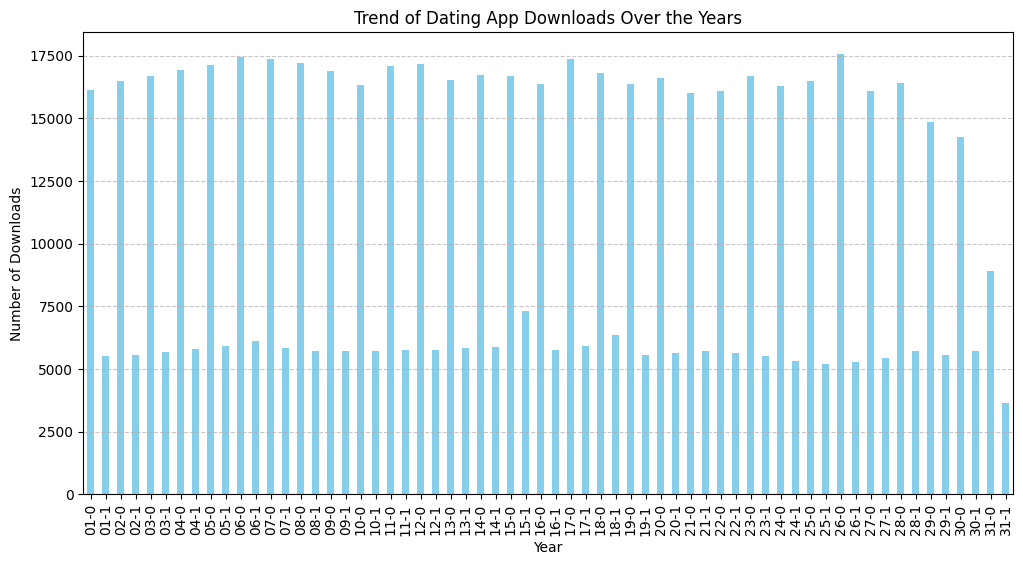

In [23]:
# Grouping data by year and counting the number of reviews
downloads_per_year = df.groupby(df['Date&Time'].str.slice(0, 4)).size()

plt.figure(figsize=(12, 6))
downloads_per_year.plot(kind='bar', color='skyblue')
plt.title('Trend of Dating App Downloads Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Downloads')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

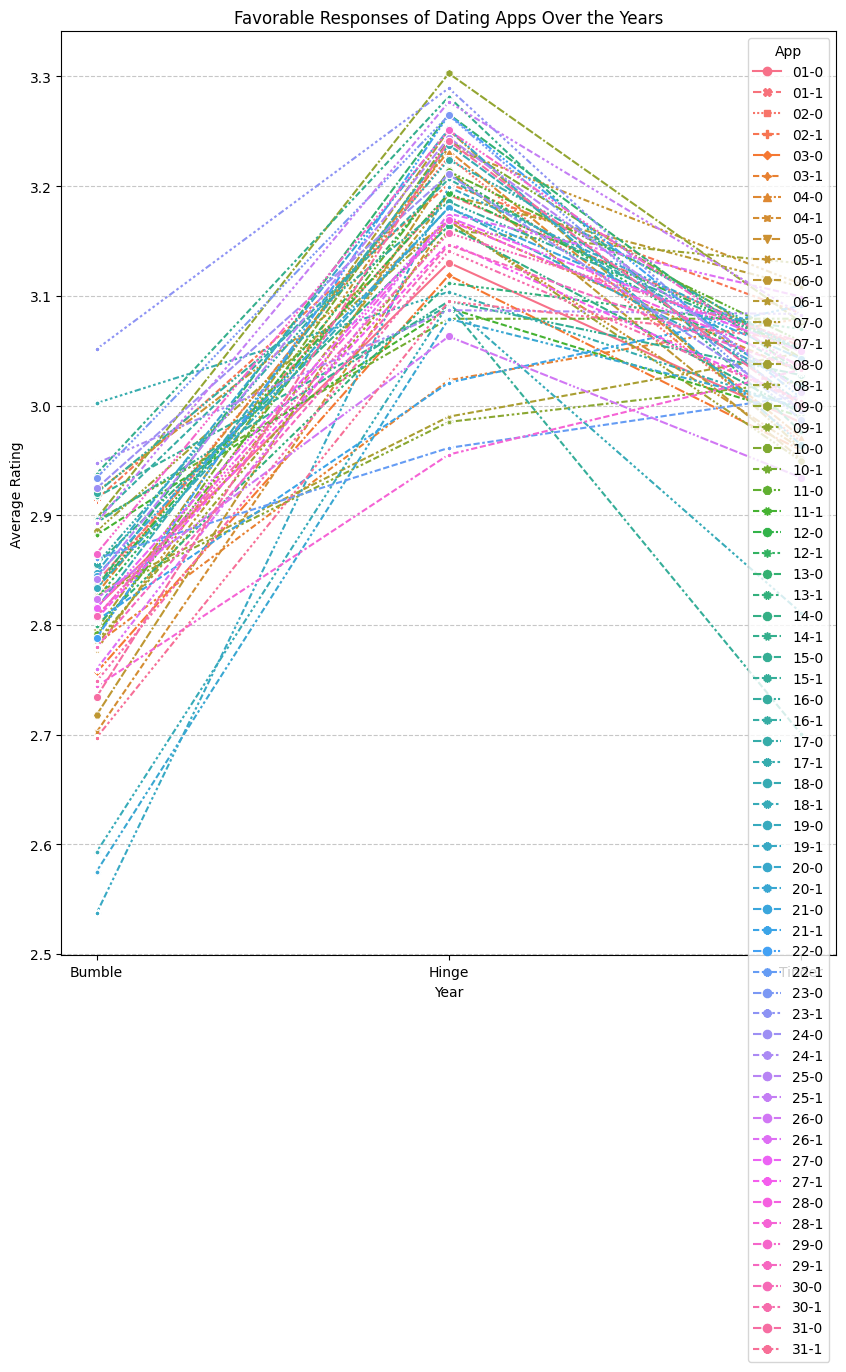

In [12]:
# Grouping data by app and year, and calculating the mean rating
favorable_responses = df.groupby(['App', df['Date&Time'].str.slice(0, 4)])['Rating'].mean().unstack()

plt.figure(figsize=(10, 12))
sns.lineplot(data=favorable_responses, markers=True)
plt.title('Favorable Responses of Dating Apps Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='App')
plt.show()

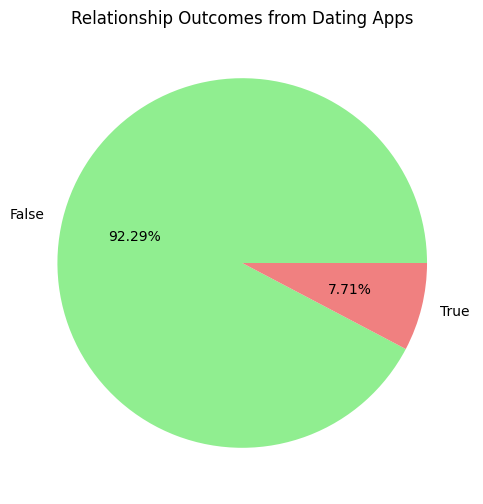

In [14]:
# Counting the occurrences of specific keywords related to relationship outcomes
relationship_keywords = ['relationship', 'love', 'partner', 'dating']
relationship_outcomes = df['Review'].str.contains('|'.join(relationship_keywords), case=False).value_counts()

plt.figure(figsize=(6, 6))
relationship_outcomes.plot(kind='pie', autopct='%1.2f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Relationship Outcomes from Dating Apps')
plt.ylabel('')
plt.show()

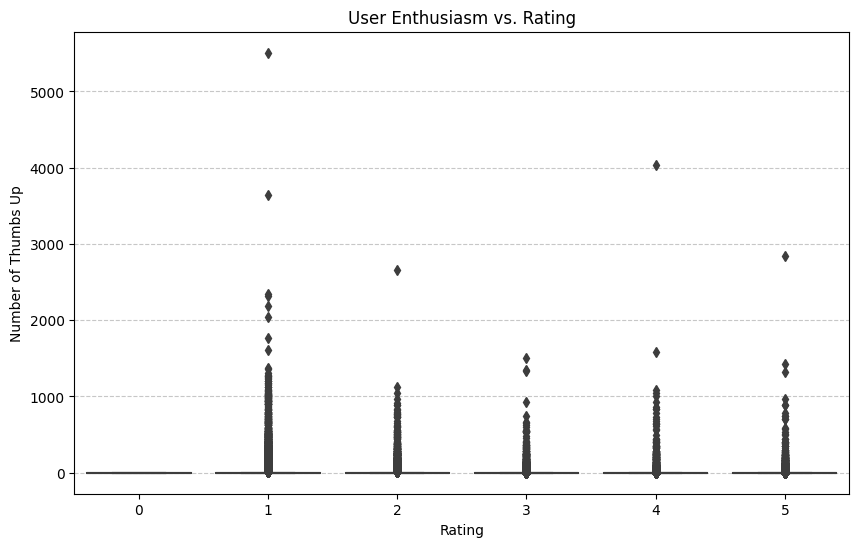

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rating', y='#ThumbsUp', data=df)
plt.title('User Enthusiasm vs. Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Thumbs Up')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

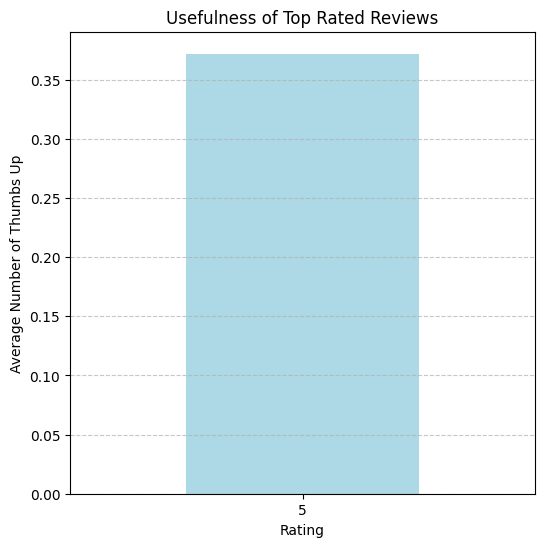

In [16]:
# Grouping data by rating and calculating the mean number of thumbs up
top_rated_reviews = df[df['Rating'] == 5].groupby('Rating')['#ThumbsUp'].mean()

plt.figure(figsize=(6, 6))
top_rated_reviews.plot(kind='bar', color='lightblue')
plt.title('Usefulness of Top Rated Reviews')
plt.xlabel('Rating')
plt.ylabel('Average Number of Thumbs Up')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

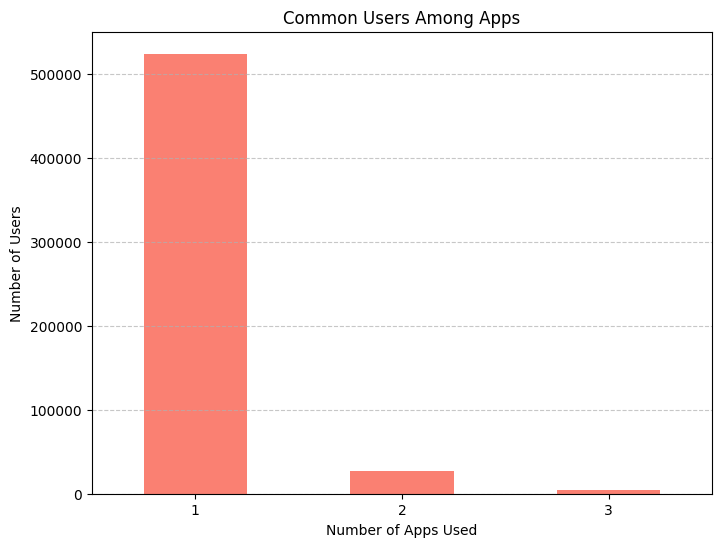

In [17]:
# Counting the common users among apps
common_users = df.groupby('Name')['App'].nunique().value_counts()

plt.figure(figsize=(8, 6))
common_users.plot(kind='bar', color='salmon')
plt.title('Common Users Among Apps')
plt.xlabel('Number of Apps Used')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

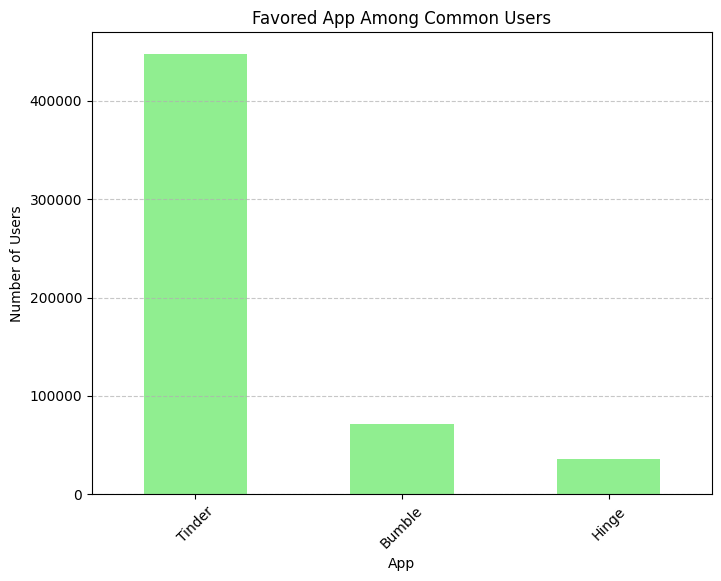

In [18]:
# Grouping data by common users and favored app
common_users_favored_app = df.groupby('Name')['App'].agg(lambda x: x.value_counts().index[0])

plt.figure(figsize=(8, 6))
common_users_favored_app.value_counts().plot(kind='bar', color='lightgreen')
plt.title('Favored App Among Common Users')
plt.xlabel('App')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

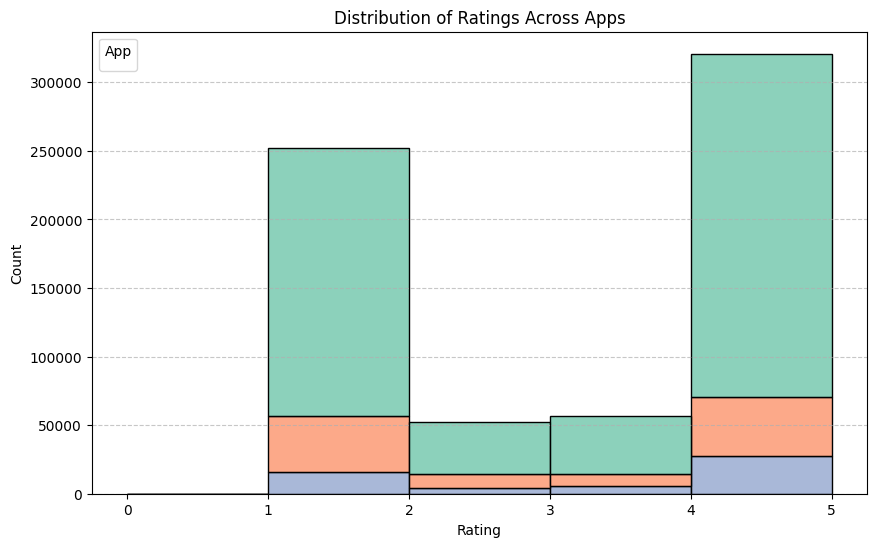

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Rating', hue='App', multiple='stack', palette='Set2', bins=5)
plt.title('Distribution of Ratings Across Apps')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='App')
plt.show()

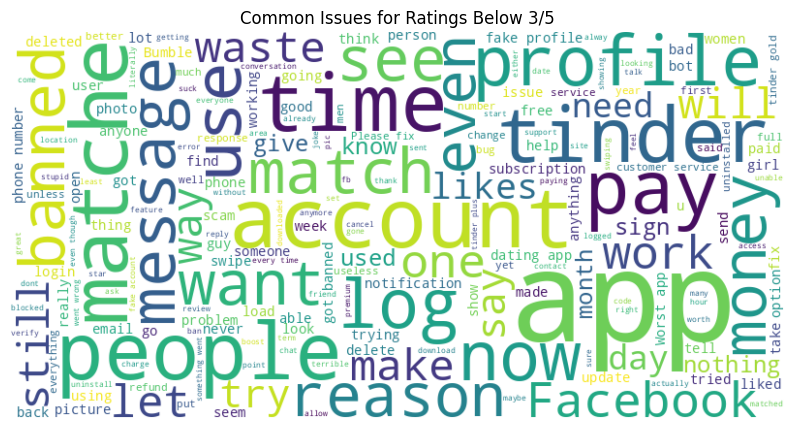

In [22]:
from wordcloud import WordCloud

# Filtering reviews with ratings below 3
low_rated_reviews = df[df['Rating'] < 3]['Review'].dropna().str.cat(sep=' ')

# Creating a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(low_rated_reviews)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Common Issues for Ratings Below 3/5')
plt.axis('off')
plt.show()